# k-means clustering

Text(0.5, 1.0, 'Original Data')

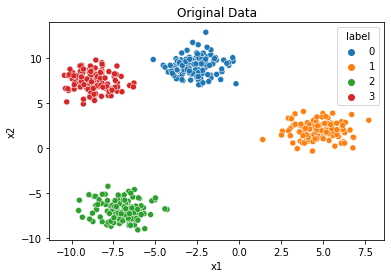

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create 500 data points
# centers make 4 clusters
# cluster_std changes how closely grouped the points are
X, y = make_blobs(500, centers = 4, random_state=42, cluster_std=1) # Here we also get the labels

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)
#X[:,0] # First column

sns.scatterplot(data = df, x = "x1", y = "x2", hue = "label", palette = "tab10")
plt.title("Original Data")

In [13]:
X = df.drop("label", axis="columns")
X.head(3)

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871


## Feature Scale Data

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X) # This is okay, since we do not have any test data
scaled_X[:3]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895]])

In [16]:
scaled_X.mean(), scaled_X.std()


(-1.0658141036401503e-17, 1.0)

Text(0.5, 1.0, 'Scaled X with feature standardisation')

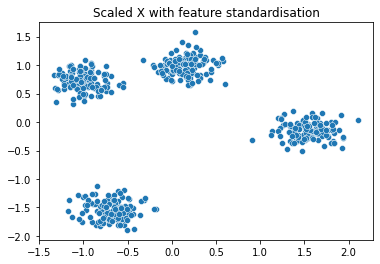

In [17]:
sns.scatterplot(x = scaled_X[:,0], y=scaled_X[:,1])
plt.title("Scaled X with feature standardisation")

## k-means clustering

In [19]:
from sklearn.cluster import KMeans

clusters = np.arange(1, 10)

sum_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]
sum_squared_distances

[999.9999999999999,
 522.1570539287742,
 116.09567852755528,
 28.786938978874026,
 25.607929506224536,
 22.8538239988003,
 20.3858209935238,
 17.946293232572202,
 16.465323236389896]

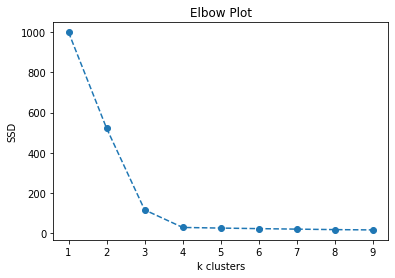

In [22]:
fig, ax = plt.figure(), plt.axes()

ax.plot(clusters, sum_squared_distances, "--o");
ax.set(title = "Elbow Plot", xlabel="k clusters", ylabel="SSD");
# If we would not have knowledge about the number of clusters, we would probably choose three or four

In [24]:
pd.Series(sum_squared_distances).diff()[1:]
# Index 1 is from 1 to 2
# Index 2 is from 2 to 1 etc
# This is the change (same info as in the picture)

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.179009
5     -2.754106
6     -2.468003
7     -2.439528
8     -1.480970
dtype: float64

## Silhouette Score

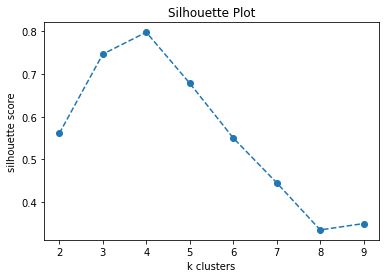

In [34]:
from sklearn.metrics import silhouette_score

fig, ax = plt.figure(), plt.axes()

kmeans = [KMeans(k).fit(scaled_X) for k in clusters]

# silhouette_scores require clusters k >= 2 
silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

ax.plot(clusters[1:], silhouette_scores, "--o");
ax.set(title="Silhouette Plot", xlabel="k clusters", ylabel="silhouette score");

In [29]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [26]:
KMeans(4).fit(scaled_X).labels_ # silhouette_score needs the labels for our clusters (this is what KMeans has labeled it as)

array([3, 0, 1, 2, 0, 0, 3, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 3, 3, 2, 1, 2,
       1, 3, 3, 0, 0, 3, 3, 2, 0, 2, 2, 2, 0, 0, 1, 1, 3, 3, 0, 1, 2, 2,
       2, 1, 1, 1, 0, 3, 0, 2, 3, 0, 1, 2, 2, 3, 0, 3, 3, 2, 0, 3, 1, 0,
       0, 3, 1, 0, 1, 0, 0, 3, 2, 3, 2, 0, 1, 2, 0, 1, 0, 2, 3, 3, 3, 3,
       1, 2, 3, 0, 1, 0, 1, 3, 2, 1, 2, 3, 1, 1, 1, 3, 3, 2, 2, 3, 2, 3,
       0, 3, 3, 3, 3, 0, 1, 3, 0, 0, 2, 1, 0, 1, 3, 1, 1, 0, 0, 3, 3, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 0, 3, 1, 1, 0, 3, 3, 2, 2, 2, 0, 0, 1, 1,
       2, 3, 2, 3, 0, 0, 3, 3, 1, 1, 0, 2, 1, 0, 3, 3, 0, 2, 2, 3, 3, 2,
       2, 0, 0, 0, 2, 3, 2, 2, 3, 3, 2, 1, 2, 0, 0, 3, 3, 0, 2, 0, 2, 2,
       3, 0, 2, 2, 0, 3, 1, 3, 0, 1, 1, 3, 3, 0, 3, 2, 2, 0, 2, 3, 2, 1,
       1, 2, 3, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 3, 0, 2, 0, 1, 1, 1, 0,
       2, 1, 3, 3, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 2, 2, 3, 2,
       0, 0, 1, 2, 1, 0, 2, 2, 1, 3, 2, 2, 2, 1, 3, 0, 2, 1, 1, 2, 0, 2,
       1, 3, 1, 0, 0, 2, 2, 1, 3, 1, 3, 1, 0, 1, 0,

## Visualisation

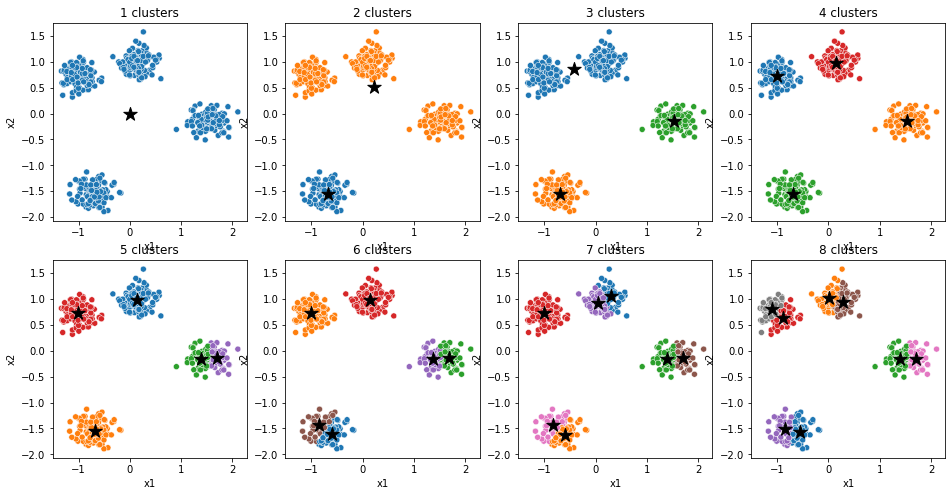

In [44]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

num_plots_row = round(len(clusters)/2)
fig, axes = plt.subplots(2, num_plots_row, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data = df_plot, x = "x1", y = "x2", hue = "label", ax = ax, palette = "tab10")
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = "*", s=200, color="black")
    ax.legend([], [], frameon=False)
    ax.set(title = f"{i+1} clusters");

In [36]:
kmeans[4].cluster_centers_ 

array([[ 0.14957993,  0.98016683],
       [-0.68486276, -1.54855438],
       [ 1.39081238, -0.1582562 ],
       [-1.00366735,  0.72139948],
       [ 1.71007486, -0.14695389]])

In [37]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]